### Minimal example

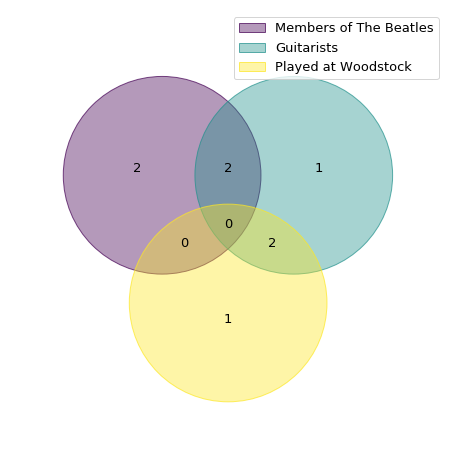

In [1]:
from venn import venn
%matplotlib inline

musicians = {
    "Members of The Beatles": {"Paul McCartney", "John Lennon", "George Harrison", "Ringo Starr"},
    "Guitarists": {"John Lennon", "George Harrison", "Jimi Hendrix", "Eric Clapton", "Carlos Santana"},
    "Played at Woodstock": {"Jimi Hendrix", "Carlos Santana", "Keith Moon"}
}
venn(musicians)

### Examples of Venn diagrams for various numbers of sets
True Venn diagrams can be plotted for 2, 3, 4, or 5 sets using ellipses, and for 6 sets using triangles.

The `venn()` function accepts optional arguments `cmap`, `fmt`, `alpha`, `fontsize`, `legend_loc`, `figsize`, and `ax`.  
`cmap` can be either a name of a matplotlib colormap or a list of color names.  
`fmt` is a Python 3 style format string that understands `{size}`, `{percentage}`, and `{logic}`.  
`legend_loc` defaults to "upper right"; to disable the legend altogether, pass `legend_loc=None`.  
`figsize` only has effect when `ax=None`; otherwise the diagram is plotted onto an existing axes and `figsize` is ignored.

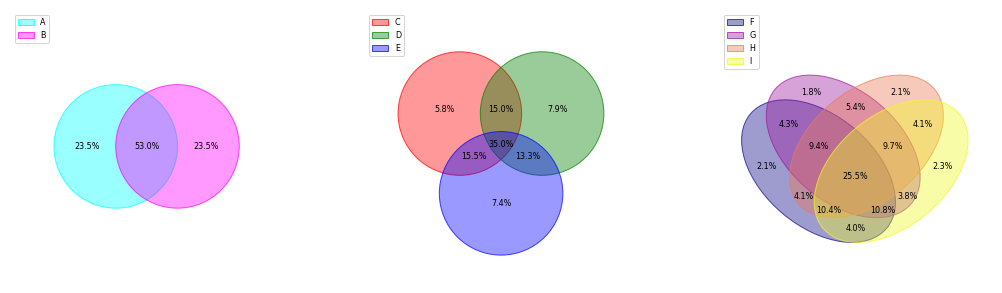

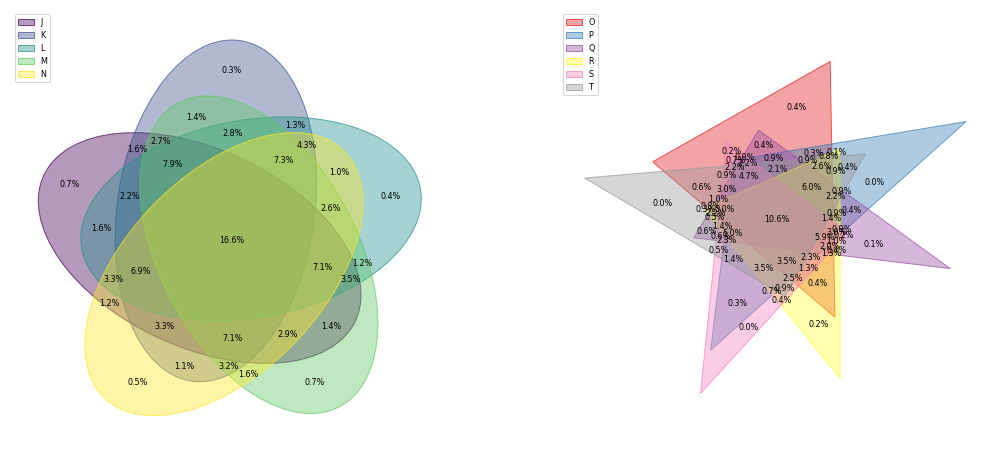

In [2]:
from matplotlib.pyplot import subplots
from itertools import chain, islice
from string import ascii_uppercase
from numpy.random import choice

_, top_axs = subplots(ncols=3, nrows=1, figsize=(18, 5))
_, bot_axs = subplots(ncols=2, nrows=1, figsize=(18, 8))
cmaps = ["cool", list("rgb"), "plasma", "viridis", "Set1"]
letters = iter(ascii_uppercase)

for n_sets, cmap, ax in zip(range(2, 7), cmaps, chain(top_axs, bot_axs)):
    dataset_dict = {
        name: set(choice(1000, 700, replace=False))
        for name in islice(letters, n_sets)
    }
    venn(dataset_dict, fmt="{percentage:.1f}%", cmap=cmap, fontsize=8, legend_loc="upper left", ax=ax)

### Pseudo-Venn diagrams:
Six-set true Venn diagrams are somewhat unwieldy, and not all intersections are usually of interest.  
To address this, the `pseudovenn()` function has been implemented which plots the sets as circles.

The function accepts the same arguments as `venn()`.  
Additionally, you can pass `hint_hidden=False` if you wish not to display information about elements in hidden intersections.  

Some intersections are not present, but the most commonly wanted are. You might want to order the input dictionary to ensure the instersections of interest show up on the diagram.  
In Python 3.7+, `dict`s are ordered by implementation; prior to Python 3.7, `collections.OrderedDict` can be used instead.

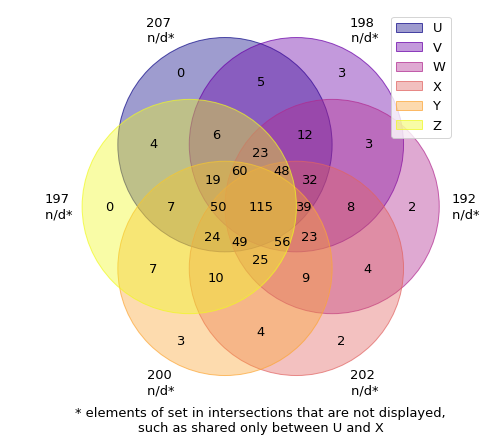

In [3]:
from venn import pseudovenn

dataset_dict = {
    name: set(choice(1000, 700, replace=False))
    for name in islice(letters, 6)
}
pseudovenn(dataset_dict, cmap="plasma")

### Manual adjustment of petal labels
If necessary, the labels on the petals (i.e., various intersections in the Venn diagram) can be adjusted manually.  
For this, `generate_petal_labels()` can be called first to get the `petal_labels` dictionary, which can be modified.  
After modification, pass `petal_labels` to functions `draw_venn()` or `draw_pseudovenn6()`.

NB: you will need to specify all parameters to the `draw_*` functions  
(the defaults are only defined for higher-level functions `venn()` and `pseudovenn()`).

In [4]:
from venn import generate_petal_labels, draw_venn, generate_colors

dataset_dict = {
    name: set(choice(1000, 250, replace=False))
    for name in list("αβγ")
}

petal_labels = generate_petal_labels(dataset_dict.values(), fmt="{size}")
petal_labels

{'001': '145',
 '010': '144',
 '011': '40',
 '100': '136',
 '101': '48',
 '110': '49',
 '111': '17'}

In [5]:
significance_filter = lambda value: value if int(value) >= 45 else "ns"
petal_labels = {
    logic: significance_filter(value)
    for logic, value in petal_labels.items()
}
for logic in "001", "010", "100":
    del petal_labels[logic]
petal_labels

{'011': 'ns', '101': '48', '110': '49', '111': 'ns'}

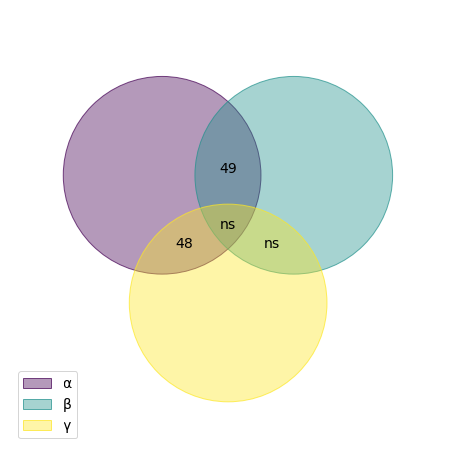

In [6]:
draw_venn(
    petal_labels=petal_labels, dataset_labels=dataset_dict.keys(),
    hint_hidden=False, colors=generate_colors(n_colors=3),
    figsize=(8, 8), fontsize=14, legend_loc="best", ax=None
)

### Backwards compatibility with tctianchi's version
As this version was forked from https://github.com/tctianchi/pyvenn, backwards compatibility with tctianchi's implementation was maintained (with deprecation warnings).  
Use the same methods as described there.

The only differences are:  
1\. You **have** to pass `names` as a named argument  
2\. Names of sets are not drawn next to the shapes (as it duplicates the names in the legend)  
3\. Argument `dpi` has no effect  
4\. Shapes have borders

C:\MSYS\home\Kirill\projects\pyvenn\venn\_backwards_compatibility.py:17: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  "use `generate_petal_labels()` or the higher level `venn()` instead"
C:\MSYS\home\Kirill\projects\pyvenn\venn\_backwards_compatibility.py:32: UserWarning: `venn3()` is retained for backwards compatibility; use `venn()` instead
  "use `venn()` instead"


(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xba2dd8c828>)

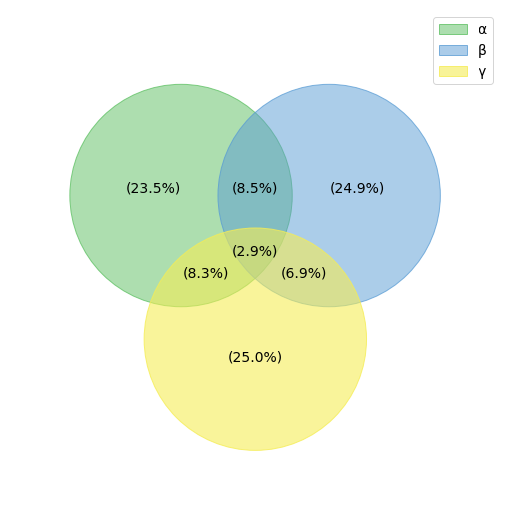

In [7]:
from venn import get_labels, venn3

labels = get_labels(dataset_dict.values(), fill=["percent"])
venn3(labels=labels, names=dataset_dict.keys())